## Fetching the data

In [64]:
#!wget https://www.dropbox.com/s/f5af80u8m7aga8n/viz-data-plaksha-final-s2021.zip?dl=1

In [65]:
#!unzip /content/viz-data-plaksha-final-s2021.zip?dl=1

In [66]:
#Reading the text files

googleurl = "/content/viz-data-plaksha-final-s2021/google.txt"
googlefile = open(googleurl, "r")
yahoourl = "/content/viz-data-plaksha-final-s2021/yahoo.txt"
yahoofile = open(yahoourl, "r")
nyurl = "/content/viz-data-plaksha-final-s2021/ny.txt"
nyfile = open(nyurl, "r")

## Preprocessing the data

In [67]:
#Importing necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
#Storing the files into Pandas dataframes

google=pd.read_csv(googleurl,sep='\s+')
yahoo=pd.read_csv(yahoourl,sep='\s+')
ny=pd.read_csv(nyurl,sep='\s+')

In [69]:
#Examining the columns

print(google.columns)
print(yahoo.columns)
print(ny.columns)

Index(['Modified', 'Julian', 'Date', 'Stock', 'Value'], dtype='object')
Index(['Modified', 'Julian', 'Date', 'Stock', 'Value'], dtype='object')
Index(['Modified', 'Julian', 'Date', 'Max', 'Temperature'], dtype='object')


In [70]:
#Dropping all the unnecessary columns

google=google.drop(labels=['Date', 'Stock', 'Value'], axis=1)
yahoo=yahoo.drop(labels=['Date', 'Stock', 'Value'], axis=1)
ny=ny.drop(labels=['Date', 'Max', 'Temperature'], axis=1)

In [71]:
#Renaming the columns

google.rename(columns = {'Modified':'Date', 'Julian':'Stock'}, inplace = True)
yahoo.rename(columns={'Modified':'Date', 'Julian':'Stock'}, inplace=True)
ny.rename(columns={'Modified':'Date', 'Julian':'Temp'}, inplace=True)

In [72]:
#Converting Date to datetime
#google['Date']=pd.to_datetime(google['Date'])
#yahoo['Date']=pd.to_datetime(yahoo['Date'])
#ny['Date']=pd.to_datetime(ny['Date'])

In [73]:
#Making the Date the index

google=google.set_index('Date')
yahoo=yahoo.set_index('Date')
ny=ny.set_index('Date')

## Plotting the data

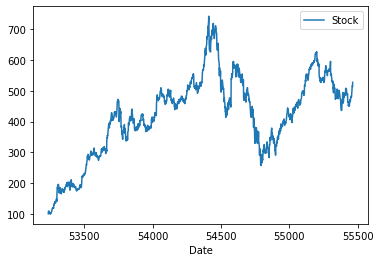

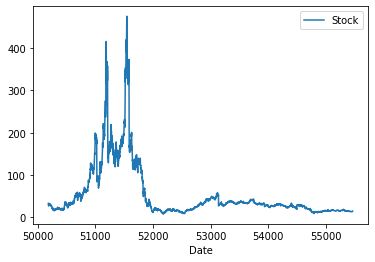

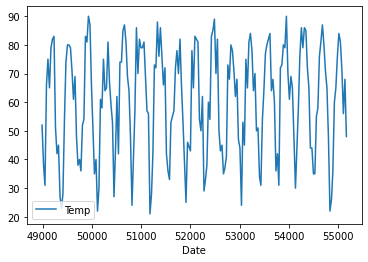

In [76]:
#Elementary plotting

google.plot()
yahoo.plot()
ny.plot()
plt.show()

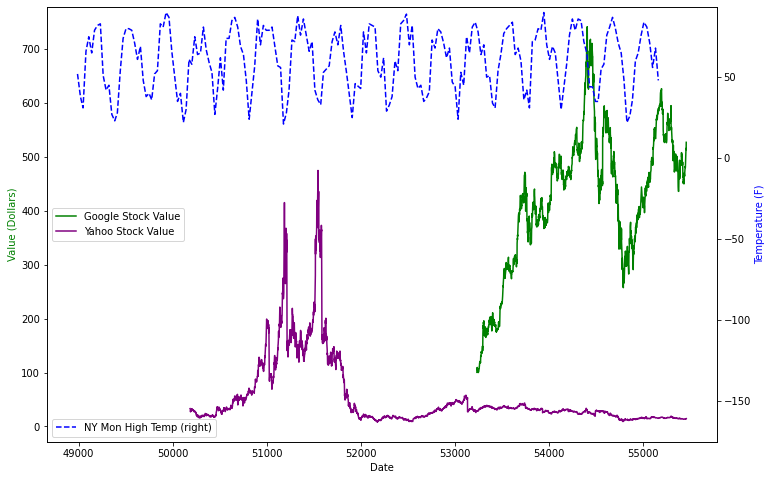

In [114]:
#Combining the stock price of Google and Yahoo

plt.figure(figsize=(12,8))
#plt.xlabel('DateMJD', color='black')
plt.ylabel('Value (Dollars)', color='g')


ax1 = google.Stock.plot(color='green', grid=False, linestyle='solid', label='Google Stock Value')
ax2 = yahoo.Stock.plot(color='purple', grid=False, secondary_y=False, linestyle='solid', label='Yahoo Stock Value')
ax3 = ny.Temp.plot(color='blue', grid=False, secondary_y=True, linestyle='dashed', label='NY Mon High Temp')

ax3.set_ylabel('Temperature (F)', color = 'b')

ax1.legend(loc=6)
ax2.legend(loc=6)
ax3.legend(loc=3)
#plt.legend(loc="center left")

ymin, ymax = plt.ylim()
plt.ylim(ymin * -10, ymax)

plt.show()